# import the needed libraies

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the data

In [48]:
df=pd.read_csv('credit_score.csv')
categorical_col=['Type_of_Loan','Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Credit_Score','Occupation']
numerical_col=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts'  ,'Num_Credit_Card','Interest_Rate'  ,'Num_of_Loan'   ,'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt' ,'Credit_Utilization_Ratio','Credit_History_Age' ,'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [49]:
len(categorical_col)+len(numerical_col)

23

# About Data


> 100000 rows ,28 column , 12500 customer,8 months ,There are no missing values in the DataFrame. 

* **ID** 
* **Customer_ID** : Represents a unique identification of a person
* **Month** : Represents the month of the year
* **Name** : Represents the name of a person
* **Age** : Represents the age of the person
* **SSN** : Represents the social security number of a person
* **Occupation** : Represents the occupation of the person
* **Annual_Income** : Represents the annual income of the person
* **Monthly_Inhand_Salary** : Represents the monthly base salary of a person
* **Num_Bank_Accounts** : Represents the number of bank accounts a person holds
* **Num_Credit_Card** : Represents the number of other credit cards held by a person
* **Interest_Rate** : Represents the interest rate on credit card
* **Num_of_Loan** : Represents the number of loans taken from the bank
* **Type_of_Loan** : Represents the types of loan taken by a person
* **Delay_from_due_date** : Represents the average number of days delayed from the payment date
* **Num_of_Delayed_Payment** : Represents the average number of payments delayed by a person
* **Changed_Credit_Limit** : Represents the percentage change in credit card limit
* **Num_Credit_Inquiries** : Represents the number of credit card inquiries
* **Credit_Mix** : Represents the classification of the mix of credits
* **Outstanding_Debt** : Represents the remaining debt to be paid (in USD)
* **Credit_Utilization_Ratio** : Represents the utilization ratio of credit card
* **Credit_History_Age** : Represents the age of credit history of the person
* **Payment_of_Min_Amount** : Represents whether only the minimum amount was paid by the person
* **Total_EMI_per_month** : Represents the monthly EMI payments (in USD)
* **Amount_invested_monthly** : Represents the monthly amount invested by the customer (in USD)
* **Payment_Behaviour** : Represents the payment behavior of the customer (in USD)
* **Monthly_Balance** : Represents the monthly balance amount of the customer (in USD)
* **Credit_Score** : Represents the bracket of credit score (Poor, Standard, Good)

## numerical data distributions 

array([[<AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Annual_Income'}>,
        <AxesSubplot: title={'center': 'Monthly_Inhand_Salary'}>],
       [<AxesSubplot: title={'center': 'Num_Bank_Accounts'}>,
        <AxesSubplot: title={'center': 'Num_Credit_Card'}>,
        <AxesSubplot: title={'center': 'Interest_Rate'}>,
        <AxesSubplot: title={'center': 'Num_of_Loan'}>],
       [<AxesSubplot: title={'center': 'Delay_from_due_date'}>,
        <AxesSubplot: title={'center': 'Num_of_Delayed_Payment'}>,
        <AxesSubplot: title={'center': 'Changed_Credit_Limit'}>,
        <AxesSubplot: title={'center': 'Num_Credit_Inquiries'}>],
       [<AxesSubplot: title={'center': 'Outstanding_Debt'}>,
        <AxesSubplot: title={'center': 'Credit_Utilization_Ratio'}>,
        <AxesSubplot: title={'center': 'Credit_History_Age'}>,
        <AxesSubplot: title={'center': 'Total_EMI_per_month'}>],
       [<AxesSubplot

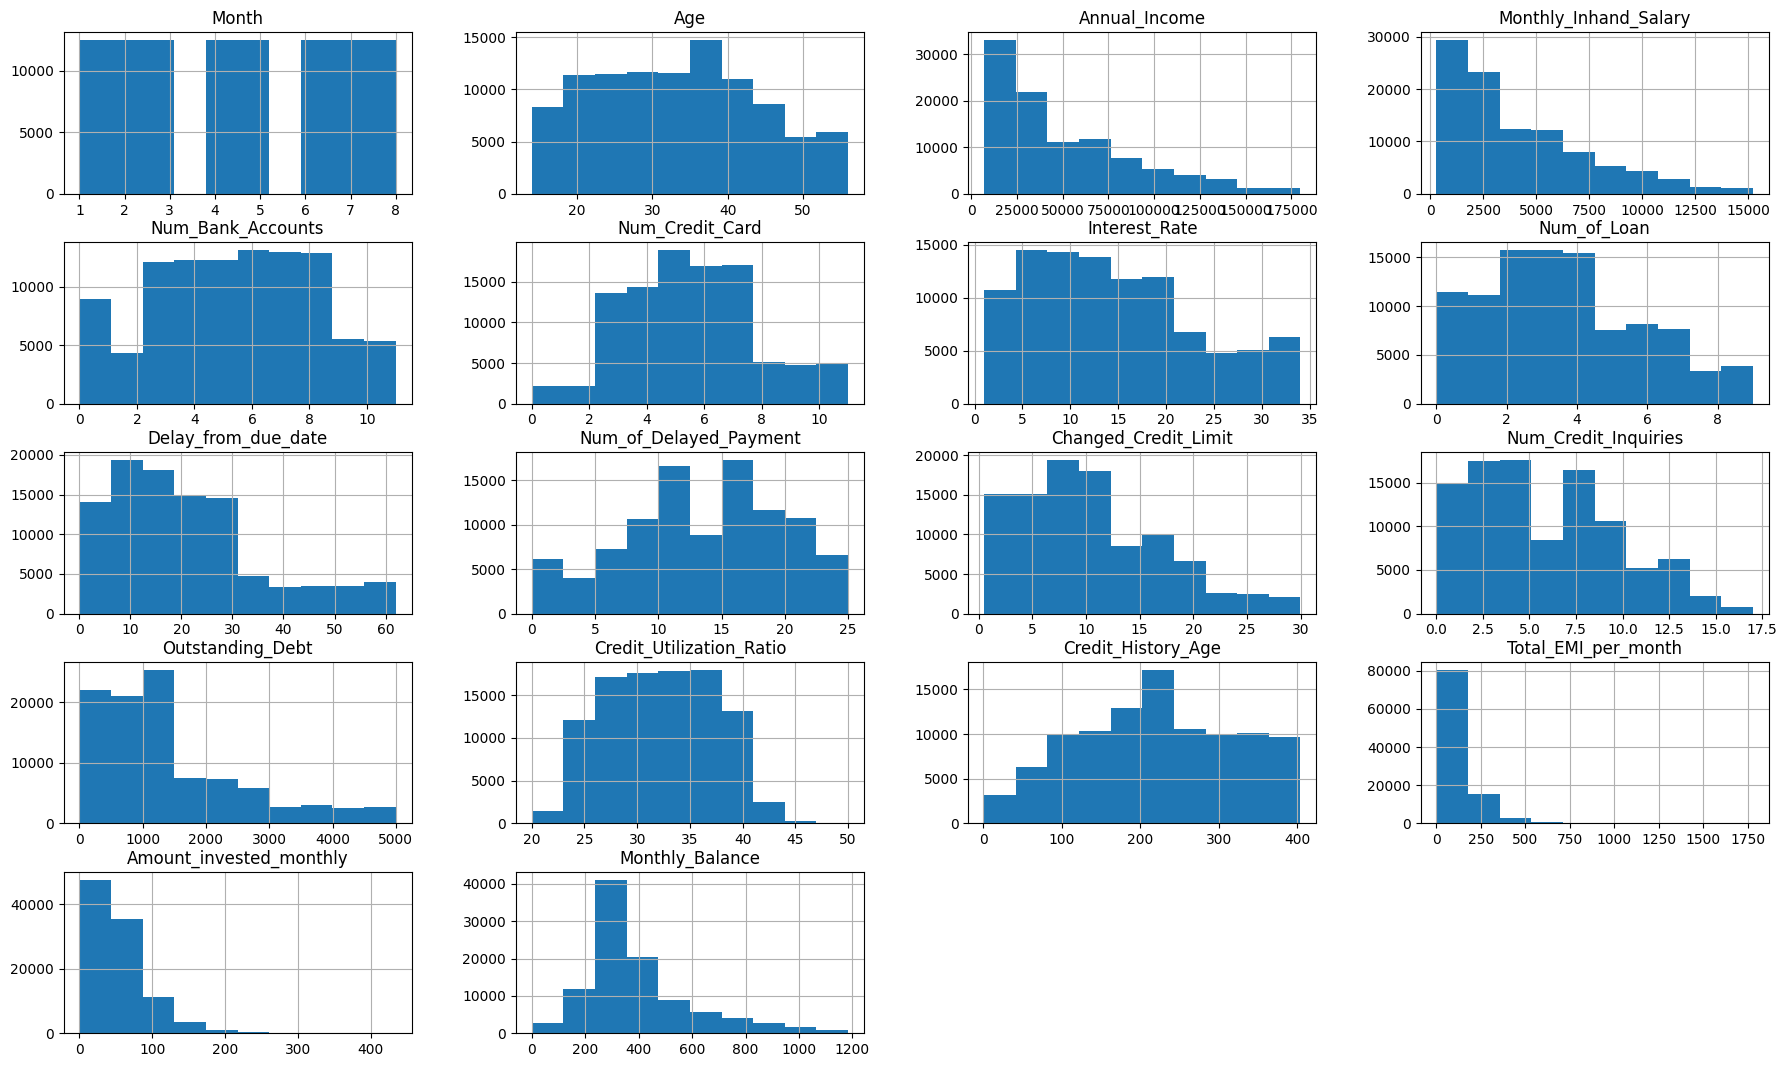

In [50]:
df.drop(['ID','Customer_ID','SSN'],axis=1).hist(figsize=(22,13))



## categorical data value counts  

* Occupation 

| Occupation | counts |
| --- | --- |
| Lawyer       | 7096|
| Engineer     | 6864|
| Architect    | 6824|
| Mechanic     | 6776|
| Scientist    | 6744|
| Accountant   | 6744|
| Developer    | 6720|
| Media_Manager| 6720|
| Teacher      | 6672|
| Entrepreneur | 6648|
| Doctor       | 6568|
| Journalist   | 6536|
| Manager      | 6432|
| Musician     | 6352|
| Writer       | 6304|
* Credit_Mix

| Credit_Mix | counts |
| --- | --- |
|Standard    |45848|
|Good        |30384|
|Bad         |23768|
* Payment_Behaviour

| Payment_Behaviour | counts |
| --- | --- |
|Low_spent_Small_value_payments      |28616|
|High_spent_Medium_value_payments    |19738|
|High_spent_Large_value_payments     |14726|
|Low_spent_Medium_value_payments     |14399|
|High_spent_Small_value_payments     |11764|
|Low_spent_Large_value_payments      |10757|
* Payment_of_Min_Amount

| Payment_of_Min_Amount | counts |
| --- | --- |
|Yes |52326|
|No  |35667|
|NM  |12007|

* Credit_Score

| Credit_Score | counts |
| --- | --- |
|Standard    |53174|
|Poor        |28998|
|Good        |17828|

* Type_of_Loan 
> df['Type_of_Loan'].str.replace(' and ', '').str.split(',').explode().str.strip().value_counts()


| Type_of_Loan | counts |
| --- | --- |
|Payday Loan               |40568|
|Credit-Builder Loan       |40440|
|Not Specified             |39616|
|Home Equity Loan          |39104|
|Student Loan              |38968|
|Mortgage Loan             |38936|
|Personal Loan             |38888|
|Debt Consolidation Loan   |38776|
|Auto Loan                 |37992|
|No Data                   |11408|

---
# exploring the data

## does each Occupation have diffrent behaviour

In [51]:
df.groupby('Occupation')[categorical_col].agg(lambda x: x.str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index[0])

,Type_of_Loan,Payment_Behaviour,Payment_of_Min_Amount,Credit_Mix,Credit_Score,Occupation
Occupation,,,,,,
Accountant,Personal Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Accountant
Architect,Payday Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Architect
Developer,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Developer
Doctor,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Doctor
Engineer,Credit-Builder Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Engineer
Entrepreneur,Not Specified,Low_spent_Small_value_payments,Yes,Standard,Standard,Entrepreneur
Journalist,Student Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Journalist
Lawyer,Personal Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Lawyer
Manager,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Manager


In [52]:
df.groupby('Occupation')[numerical_col].mean()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Occupation,,,,,,,,,,,,,,,,,
Accountant,33.583333,50726.120480,4216.962042,5.314650,5.558126,14.567023,3.527877,21.149170,13.457147,10.855030,5.860617,1437.899692,32.284384,220.327550,110.878262,55.946485,394.136740
Architect,33.463658,51875.392298,4316.155800,5.327081,5.452227,13.989449,3.422040,20.453986,13.254543,10.166981,5.589683,1343.206471,32.356069,226.735785,108.408140,56.466135,399.349824
Developer,33.292113,50128.422143,4163.388887,5.345387,5.619792,14.695238,3.605952,21.251488,13.484970,10.696935,5.875298,1440.633464,32.262524,219.107589,104.803925,54.600054,394.048467
Doctor,33.068819,49517.749976,4120.477608,5.386419,5.491017,14.489647,3.697929,20.833283,13.410018,10.480822,5.780451,1452.149013,32.228175,220.161541,111.119796,54.429357,387.307192
Engineer,32.523456,50730.654073,4216.266751,5.385927,5.535693,14.707459,3.545455,21.720425,13.263112,10.688625,5.900641,1451.853578,32.411861,217.463432,104.798921,53.634943,395.634919
Entrepreneur,33.350030,50987.698177,4237.066988,5.378610,5.573406,14.509025,3.641396,21.141847,13.245638,10.078748,5.874699,1397.060361,32.223078,222.625602,113.904159,55.409847,388.559501
Journalist,33.926714,48430.088415,4027.029770,5.391065,5.579253,14.473684,3.402693,20.272338,13.349755,10.394871,5.774021,1448.889204,32.182588,225.716034,99.795654,53.208047,386.206094
Lawyer,33.928833,49594.217396,4124.218989,5.235626,5.481962,14.506201,3.479143,20.870772,13.164600,10.406770,5.719560,1351.291962,32.207675,220.509724,102.770095,54.660136,390.723212
Manager,32.886039,51466.767817,4271.984515,5.394900,5.475435,14.835821,3.541045,21.280473,13.460821,10.442195,5.814521,1462.104826,32.397883,222.264614,107.959775,56.154971,398.625219
